In [68]:

import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
import random
import os
import cv2

In [69]:
#Directory Path
train_dir = '/Users/shusallamsal/Desktop/Cat Dog classifier/classes/train'
test_dir = '/Users/shusallamsal/Desktop/Cat Dog classifier/classes/test'


In [70]:
#Generaters

# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir, batch_size=32, labels='inferred', label_mode='int', image_size=(256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory=test_dir, batch_size=32, labels='inferred', label_mode='int', image_size=(256, 256)
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [71]:
# Normalize
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [72]:
# Create CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='valid', activation='relu', input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2, padding='valid'),
    tf.keras.layers.Conv2D(64, (3,3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2, padding='valid'),
    tf.keras.layers.Conv2D(128, (3,3), padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1189s 2s/step - accuracy: 0.5938 - loss: 0.6937 - val_accuracy: 0.7490 - val_loss: 0.5146
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 990s 2s/step - accuracy: 0.7645 - loss: 0.4872 - val_accuracy: 0.7956 - val_loss: 0.4517
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 977s 2s/step - accuracy: 0.8243 - loss: 0.3810 - val_accuracy: 0.7904 - val_loss: 0.4796
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1012s 2s/step - accuracy: 0.8958 - loss: 0.2488 - val_accuracy: 0.7890 - val_loss: 0.5867
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1028s 2s/step - accuracy: 0.9431 - loss: 0.1419 - val_accuracy: 0.7842 - val_loss: 0.8936
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1104s 2s/step - accuracy: 0.9669 - loss: 0.0885 - val_accuracy: 0.7790 - val_loss: 1.1930
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1131s 2s/step - accuracy: 0.9803 - loss: 0.0548 - val_accuracy: 0.7844 - val_loss: 1.1032
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1111s 2s/step - accuracy: 0.9822 - loss: 0.0580 - va

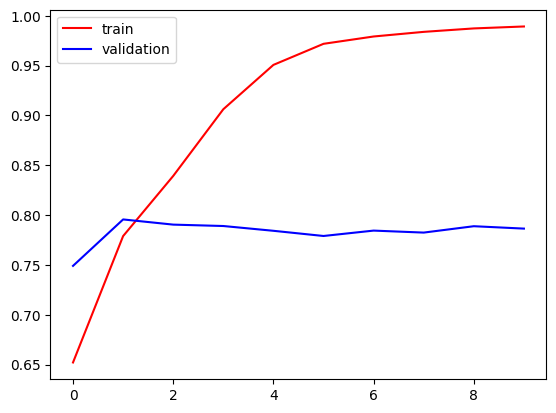

In [76]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


In [77]:
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array


In [78]:

def display_predictions(img_paths, model):
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(img_paths):
        # Load and preprocess the image
        img_array = load_and_preprocess_image(img_path)
        
        # Make the prediction
        prediction = model.predict(img_array)
        
        # Get the predicted label
        label = 'Dog' if prediction[0] > 0.5 else 'Cat'
        confidence = prediction[0][0] if label == 'Dog' else 1 - prediction[0][0]
        
        # Display the image with prediction
        img = image.load_img(img_path, target_size=(256, 256))
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"Predicted: {label} ({confidence*100:.2f}%)")
        plt.axis('off')
    plt.show()


In [79]:
def test_random_images(test_dir, model, num_images=6):
    # Get the list of all images in the test directory
    all_images = []
    for root, dirs, files in os.walk(test_dir):
        for file in files:
            if file.endswith(('jpeg', 'jpg', 'png')):
                all_images.append(os.path.join(root, file))
    
    print(f"Found {len(all_images)} images in the test directory.")


Found 5000 images in the test directory.
Randomly selected 6 images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


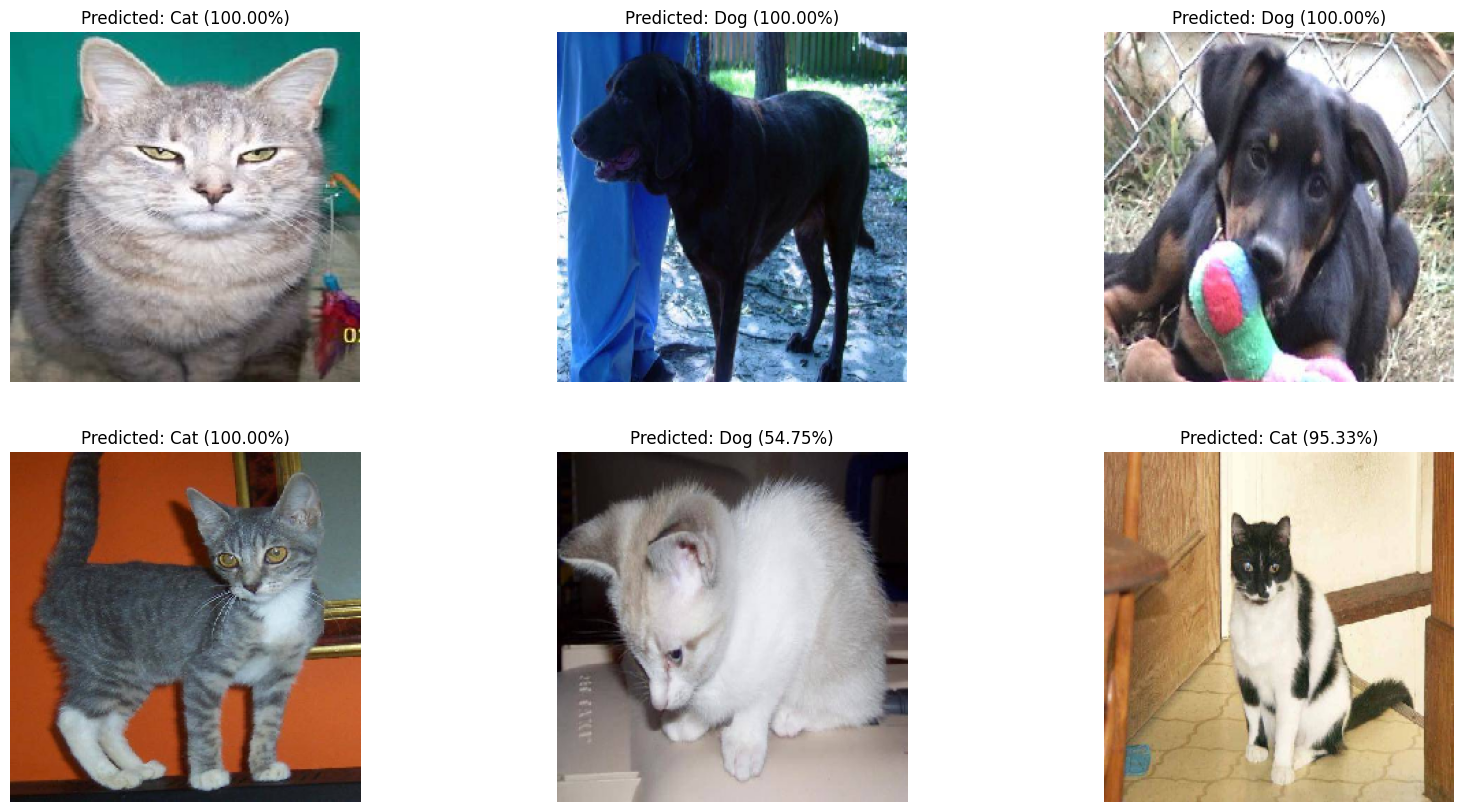

In [80]:
def test_random_images(test_dir, model, num_images=6):
    # Get the list of all images in the test directory
    all_images = []
    for root, dirs, files in os.walk(test_dir):
        for file in files:
            if file.endswith(('jpeg', 'jpg', 'png')):
                all_images.append(os.path.join(root, file))
    
    print(f"Found {len(all_images)} images in the test directory.")

    # Randomly select the specified number of images
    img_paths = random.sample(all_images, num_images)
    
    print(f"Randomly selected {num_images} images.")

    # Display predictions for the selected images
    display_predictions(img_paths, model)

# Example usage
test_random_images(test_dir, model)

In [82]:
model.save("CatDog_Classification.keras")